## Import the libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing

import nltk
nltk.download('stopwords')
nltk.download('words')

from nltk.corpus import stopwords
set(stopwords.words('english'))

from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer, wordpunct_tokenize 
from nltk.tag import pos_tag, pos_tag_sents
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances

from gensim import corpora, models, similarities, matutils
from wordcloud import WordCloud

import seaborn as sns
import sklearn.cluster as cluster

import re
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/psuresh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /Users/psuresh/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


## Import the recipes file using the dataset obtained from Kaggle

In [2]:
recipes = pd.read_csv("RAW_recipes.csv")

In [3]:
recipes

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8
...,...,...,...,...,...,...,...,...,...,...,...,...
231632,zydeco soup,486161,60,227978,2012-08-29,"['ham', '60-minutes-or-less', 'time-to-make', ...","[415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]",7,"['heat oil in a 4-quart dutch oven', 'add cele...",this is a delicious soup that i originally fou...,"['celery', 'onion', 'green sweet pepper', 'gar...",22
231633,zydeco spice mix,493372,5,1500678,2013-01-09,"['15-minutes-or-less', 'time-to-make', 'course...","[14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]",1,['mix all ingredients together thoroughly'],this spice mix will make your taste buds dance!,"['paprika', 'salt', 'garlic powder', 'onion po...",13
231634,zydeco ya ya deviled eggs,308080,40,37779,2008-06-07,"['60-minutes-or-less', 'time-to-make', 'course...","[59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]",7,"['in a bowl , combine the mashed yolks and may...","deviled eggs, cajun-style","['hard-cooked eggs', 'mayonnaise', 'dijon must...",8
231635,cookies by design cookies on a stick,298512,29,506822,2008-04-15,"['30-minutes-or-less', 'time-to-make', 'course...","[188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]",9,['place melted butter in a large mixing bowl a...,"i've heard of the 'cookies by design' company,...","['butter', 'eagle brand condensed milk', 'ligh...",10


In [5]:
recipes[recipes["id"] == 40893]

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
225877,white bean green chile pepper soup,40893,495,1533,2002-09-21,"['weeknight', 'time-to-make', 'course', 'main-...","[204.8, 5.0, 9.0, 26.0, 24.0, 2.0, 10.0]",4,"['combine beans , onion , chilies , 1 / 2 teas...",easy soup for the crockpot.,"['great northern beans', 'yellow onion', 'dice...",9


In [13]:
recipes.ingredients[0]

"['winter squash', 'mexican seasoning', 'mixed spice', 'honey', 'butter', 'olive oil', 'salt']"

In [7]:
recipes.dtypes

name              object
id                 int64
minutes            int64
contributor_id     int64
submitted         object
tags              object
nutrition         object
n_steps            int64
steps             object
description       object
ingredients       object
n_ingredients      int64
dtype: object

In [8]:
recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [3]:
recipes['ingredients'][3]

"['spreadable cheese with garlic and herbs', 'new potatoes', 'shallots', 'parsley', 'tarragon', 'olive oil', 'red wine vinegar', 'salt', 'pepper', 'red bell pepper', 'yellow bell pepper']"

In [4]:
recipes['ingredients'][8]

"['chocolate sandwich style cookies', 'chocolate syrup', 'vanilla ice cream', 'bananas', 'strawberry ice cream', 'whipped cream']"

## Import the User Reviews into a Dataframe

In [5]:
recipe_interact = pd.read_csv("RAW_interactions.csv")

In [6]:
recipe_interact

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."
...,...,...,...,...,...
1132362,116593,72730,2003-12-09,0,Another approach is to start making sauce with...
1132363,583662,386618,2009-09-29,5,These were so delicious! My husband and I tru...
1132364,157126,78003,2008-06-23,5,WOW! Sometimes I don't take the time to rate ...
1132365,53932,78003,2009-01-11,4,Very good! I used regular port as well. The ...


In [7]:
#Merge Recipes and Reviews dataframe
all_recipes = pd.merge(recipes, recipe_interact, how='left', left_on='id', right_on='recipe_id')

In [8]:
all_recipes.rating.value_counts(normalize=True)

5    0.720936
4    0.165459
0    0.053734
3    0.036079
2    0.012472
1    0.011320
Name: rating, dtype: float64

More than 85% of the recipes are rated more than 4 stars. Let us use those recipes for recommendations.

In [25]:
highly_rated_recipes = all_recipes[(all_recipes["rating"]== 4) | (all_recipes["rating"]== 5)].copy()


### Filtering out rows that are duplicated due to the merge

In [26]:
highly_rated_recipes.drop_duplicates(subset='id', inplace=True)

In [27]:
highly_rated_recipes

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,user_id,recipe_id,date,rating,review
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,4470,137739,2006-02-18,5,I used an acorn squash and recipe#137681 Swee...
4,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6,346277,31490,2006-08-27,5,This recipe was wonderful. Instead of using t...
7,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13,255952,112140,2005-10-27,4,I added black beans and corn to this and LOVED...
8,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11,296809,59389,2008-06-11,4,"This is an excellent, easy-fix side-dish w/ton..."
10,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8,1310146,44061,2011-08-21,5,"I wasn't sure how this was going to turn out, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132348,zydeco sauce,357451,15,461283,2009-02-23,"['15-minutes-or-less', 'time-to-make', 'course...","[239.9, 30.0, 19.0, 22.0, 1.0, 14.0, 5.0]",3,"['to make the sauce , combine the mayonnaise ,...",great sauce for cheeseburgers or dipping fries...,"['mayonnaise', 'prepared horseradish', 'worces...",6,865936,357451,2009-02-26,5,Very tasty sauce. I made it with the Louisian...
1132351,zydeco soup,486161,60,227978,2012-08-29,"['ham', '60-minutes-or-less', 'time-to-make', ...","[415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]",7,"['heat oil in a 4-quart dutch oven', 'add cele...",this is a delicious soup that i originally fou...,"['celery', 'onion', 'green sweet pepper', 'gar...",22,1271506,486161,2012-09-10,5,Now the only substitution I made was African B...
1132357,zydeco spice mix,493372,5,1500678,2013-01-09,"['15-minutes-or-less', 'time-to-make', 'course...","[14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]",1,['mix all ingredients together thoroughly'],this spice mix will make your taste buds dance!,"['paprika', 'salt', 'garlic powder', 'onion po...",13,653438,493372,2013-01-17,5,Made for New Kids on the Block tag game and fo...
1132358,zydeco ya ya deviled eggs,308080,40,37779,2008-06-07,"['60-minutes-or-less', 'time-to-make', 'course...","[59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]",7,"['in a bowl , combine the mashed yolks and may...","deviled eggs, cajun-style","['hard-cooked eggs', 'mayonnaise', 'dijon must...",8,428885,308080,2008-10-09,5,"I loved these eggs. How different, how good, a..."


In [20]:
highly_rated_recipes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217565 entries, 0 to 1132365
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            217565 non-null  object
 1   id              217565 non-null  int64 
 2   minutes         217565 non-null  int64 
 3   contributor_id  217565 non-null  int64 
 4   submitted       217565 non-null  object
 5   tags            217565 non-null  object
 6   nutrition       217565 non-null  object
 7   n_steps         217565 non-null  int64 
 8   steps           217565 non-null  object
 9   description     212964 non-null  object
 10  ingredients     217565 non-null  object
 11  n_ingredients   217565 non-null  int64 
 12  user_id         217565 non-null  int64 
 13  recipe_id       217565 non-null  int64 
 14  date            217565 non-null  object
 15  rating          217565 non-null  int64 
 16  review          217552 non-null  object
dtypes: int64(8), object(9)
memor

### Remove special characters and punctuation in the text

In [21]:
def remove_spl_char(desc):
    punc = '''!()-[]{};:'"\<>./?@#$%^&*_~'''
    desc = re.sub('\w*\d\w*', ' ', desc)
    
    # Removing punctuations in string
    for element in desc:
        if element in punc:
            desc = desc.replace(element, "")
    #desc = re.sub(r'[^\w\s]', '', desc)
    return desc

In [28]:
highly_rated_recipes["ingred"] = highly_rated_recipes.ingredients.apply(remove_spl_char)

In [29]:
highly_rated_recipes["ingred"] = highly_rated_recipes["ingred"].replace('\s+', ' ', regex=True)
highly_rated_recipes["ingred"][0]

'winter squash, mexican seasoning, mixed spice, honey, butter, olive oil, salt'

In [30]:
highly_rated_recipes.duplicated(subset='ingred').sum()

1051

#### Remove the duplicated rows in Ingredients column caused by merging with Reviews dataframe

In [31]:
highly_rated_recipes.drop_duplicates(subset='ingred', keep='last', inplace=True)

In [32]:
len(highly_rated_recipes)

216514

In [33]:
highly_rated_recipes['tokenized'] = highly_rated_recipes["ingred"].apply(sent_tokenize)

In [34]:
highly_rated_recipes['tokenized']

0          [winter squash, mexican seasoning, mixed spice...
4          [prepared pizza crust, sausage patty, eggs, mi...
7          [ground beef, yellow onions, diced tomatoes, t...
8          [spreadable cheese with garlic and herbs, new ...
10         [tomato juice, apple cider vinegar, sugar, sal...
                                 ...                        
1132348    [mayonnaise, prepared horseradish, worcestersh...
1132351    [celery, onion, green sweet pepper, garlic clo...
1132357    [paprika, salt, garlic powder, onion powder, d...
1132358    [hardcooked eggs, mayonnaise, dijon mustard, s...
1132365    [granulated sugar, shortening, eggs, flour, cr...
Name: tokenized, Length: 216514, dtype: object

In [35]:
stop_words = stopwords.words('english')

In [36]:
highly_rated_recipes['tokenized']= highly_rated_recipes['tokenized'].apply(lambda x: [item for item in x if item not in stop_words])

highly_rated_recipes['tokenized']


0          [winter squash, mexican seasoning, mixed spice...
4          [prepared pizza crust, sausage patty, eggs, mi...
7          [ground beef, yellow onions, diced tomatoes, t...
8          [spreadable cheese with garlic and herbs, new ...
10         [tomato juice, apple cider vinegar, sugar, sal...
                                 ...                        
1132348    [mayonnaise, prepared horseradish, worcestersh...
1132351    [celery, onion, green sweet pepper, garlic clo...
1132357    [paprika, salt, garlic powder, onion powder, d...
1132358    [hardcooked eggs, mayonnaise, dijon mustard, s...
1132365    [granulated sugar, shortening, eggs, flour, cr...
Name: tokenized, Length: 216514, dtype: object

In [37]:
highly_rated_recipes['tokenized'] = highly_rated_recipes['tokenized'].astype(str)
highly_rated_recipes['tokenized']=highly_rated_recipes['tokenized'].str.lower()

In [38]:
lookup_dict = {"eggs":"egg", "tomatoes": "tomato", "onions": "onion", "potatoes": "potato", "with":"", "and" : "", "fresh":"", "ground":"", "allpurpose":"","bananas":"banana","leaves":"leaf", "cloves":"clove","extract":"", "chopped":"", "frozen":""}


In [39]:
def clean_up_tokens(text):
    text = text.replace('[','').replace(']','').replace('\'','')
    li = list(text.split(","))
    newline = []
    for index, data in enumerate(li):
        for key, value in lookup_dict.items():
            if key in data:
                temp_t = data.replace(key, lookup_dict[key])
                break
            else:
                temp_t = data
            continue
        newline.append(temp_t)
    return(newline)  

In [98]:
#print(clean_up_tokens(temp))

['spreadable cheese  garlic and herbs', ' new potato', ' shallots', ' parsley', ' tarragon', ' olive oil', ' red wine vinegar', ' salt', ' pepper', ' red bell pepper', ' yellow bell pepper']


In [40]:
highly_rated_recipes['tokenized1'] = highly_rated_recipes['tokenized'].apply(clean_up_tokens)

In [41]:
highly_rated_recipes['tokenized1'] = highly_rated_recipes['tokenized1'].astype(str)
highly_rated_recipes['tokenized1']

0          ['winter squash', ' mexican seasoning', ' mixe...
4          ['prepared pizza crust', ' sausage patty', ' e...
7          [' beef', ' yellow onion', ' diced tomato', ' ...
8          ['spreadable cheese  garlic and herbs', ' new ...
10         ['tomato juice', ' apple cider vinegar', ' sug...
                                 ...                        
1132348    ['mayonnaise', ' prepared horseradish', ' worc...
1132351    ['celery', ' onion', ' green sweet pepper', ' ...
1132357    ['paprika', ' salt', ' garlic powder', ' onion...
1132358    ['hardcooked egg', ' mayonnaise', ' dijon must...
1132365    ['granulated sugar', ' shortening', ' egg', ' ...
Name: tokenized1, Length: 216514, dtype: object

#### Create custom tokens by converting each ingredient into a token. For example use Olive_Oil as a token instead of splitting it up into 2 tokens Olive and Oil.

In [42]:
highly_rated_recipes['tokenized1'] = highly_rated_recipes['tokenized1'].apply(lambda x: x.replace('\' ', '\'').replace(' ', '_').replace(',_\'_', ',\'').replace(',_',',').replace('_,',',').replace('__','_'))

#temp11

In [43]:
highly_rated_recipes['tokenized1'][:15]

0     ['winter_squash','mexican_seasoning','mixed_sp...
4     ['prepared_pizza_crust','sausage_patty','egg',...
7     ['beef','yellow_onion','diced_tomato','tomato_...
8     ['spreadable_cheese_garlic_and_herbs','new_pot...
10    ['tomato_juice','apple_cider_vinegar','sugar',...
11    ['milk','vanilla_ice_cream','apple_juice_conce...
14    ['pork_spareribs','soy_sauce','garlic','ginger...
15    ['chocolate_swich_style_cookies','chocolate_sy...
17    ['sugar','unsalted_butter','banana','egg','lem...
24    ['vanilla_wafers','butter','powdered_sugar','e...
28    ['great_northern_bean','chicken_bouillon_cubes...
38    ['collard_greens','brown_sugar','molasses','ho...
40    ['gentian_root','scullcap_herb','burnet_root',...
41    ['lean_pork_chops','flour','salt','dry_mustard...
60    ['egg_roll_wrap','whole_green_chilies','cheese...
Name: tokenized1, dtype: object

In [44]:
highly_rated_recipes[['name', 'steps', 'description', 'review', 'ingredients', 'tokenized1']]

,name,steps,description,review,ingredients,tokenized1
0,arriba baked winter squash mexican style,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,I used an acorn squash and recipe#137681 Swee...,"['winter squash', 'mexican seasoning', 'mixed ...","['winter_squash','mexican_seasoning','mixed_sp..."
4,a bit different breakfast pizza,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,This recipe was wonderful. Instead of using t...,"['prepared pizza crust', 'sausage patty', 'egg...","['prepared_pizza_crust','sausage_patty','egg',..."
7,all in the kitchen chili,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,I added black beans and corn to this and LOVED...,"['ground beef', 'yellow onions', 'diced tomato...","['beef','yellow_onion','diced_tomato','tomato_..."
8,alouette potatoes,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","This is an excellent, easy-fix side-dish w/ton...","['spreadable cheese with garlic and herbs', 'n...","['spreadable_cheese_garlic_and_herbs','new_pot..."
10,amish tomato ketchup for canning,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"I wasn't sure how this was going to turn out, ...","['tomato juice', 'apple cider vinegar', 'sugar...","['tomato_juice','apple_cider_vinegar','sugar',..."
...,...,...,...,...,...,...
1132348,zydeco sauce,"['to make the sauce , combine the mayonnaise ,...",great sauce for cheeseburgers or dipping fries...,Very tasty sauce. I made it with the Louisian...,"['mayonnaise', 'prepared horseradish', 'worces...","['mayonnaise','prepared_horseradish','worceste..."
1132351,zydeco soup,"['heat oil in a 4-quart dutch oven', 'add cele...",this is a delicious soup that i originally fou...,Now the only substitution I made was African B...,"['celery', 'onion', 'green sweet pepper', 'gar...","['celery','onion','green_sweet_pepper','garlic..."
1132357,zydeco spice mix,['mix all ingredients together thoroughly'],this spice mix will make your taste buds dance!,Made for New Kids on the Block tag game and fo...,"['paprika', 'salt', 'garlic powder', 'onion po...","['paprika','salt','garlic_powder','onion_powde..."
1132358,zydeco ya ya deviled eggs,"['in a bowl , combine the mashed yolks and may...","deviled eggs, cajun-style","I loved these eggs. How different, how good, a...","['hard-cooked eggs', 'mayonnaise', 'dijon must...","['hardcooked_egg','mayonnaise','dijon_mustard'..."


In [45]:
X = highly_rated_recipes['tokenized1']

### CountVectorizer

In [46]:
cv = CountVectorizer(min_df=0.01)
recipes_cv = cv.fit_transform(X)

In [47]:
pd.DataFrame(recipes_cv.toarray(), columns=cv.get_feature_names())

,allspice,bacon,baking_powder,baking_soda,balsamic_vinegar,banana,basil,bay_leaf,beef,black_beans,...,walnuts,water,whipping_cream,white_pepper,white_sugar,white_wine,whole_wheat_flour,worcestershire_sauce,yellow_onion,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216509,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
216510,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
216511,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
216512,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF Vectorizer

In [48]:
tfidf = TfidfVectorizer(stop_words='english', min_df=0.01, binary=True)
recipes_tfidf = tfidf.fit_transform(X)
tfidf_df = pd.DataFrame(recipes_tfidf.toarray(), columns = tfidf.get_feature_names())

In [49]:
tfidf_df

,allspice,bacon,baking_powder,baking_soda,balsamic_vinegar,banana,basil,bay_leaf,beef,black_beans,...,walnuts,water,whipping_cream,white_pepper,white_sugar,white_wine,whole_wheat_flour,worcestershire_sauce,yellow_onion,zucchini
0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
1,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.354886,0.0,...,0.0,0.224543,0.0,0.0,0.0,0.0,0.0,0.000000,0.412067,0.0
3,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
4,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216509,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.533653,0.000000,0.0
216510,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
216511,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
216512,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0


## Topic Modeling

### Non-Negative Matrix Factorization (NMF)

Try NMF with CountVectorizer

In [50]:
#Try with 10 topics to begin with
nmf_model=NMF(10)
doc_topic = nmf_model.fit_transform(recipes_cv)

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [51]:
recipe_topics = nmf_model.transform(recipes_cv)

In [52]:
recipe_topics_df = pd.DataFrame(recipe_topics).add_prefix('topic_')

In [53]:
recipe_topics_df

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
0,0.044106,0.000000,0.059644,0.000000,0.000000,0.000000,0.001020,0.057768,0.000000,0.005036
1,0.000000,0.007712,0.005422,0.000000,0.000000,0.000000,0.000000,0.009839,0.045473,0.000000
2,0.045706,0.017899,0.001045,0.000000,0.012859,0.000000,0.079519,0.001378,0.000000,0.000000
3,0.054636,0.004701,0.000000,0.000000,0.000157,0.003167,0.000000,0.070444,0.000000,0.000000
4,0.054490,0.005595,0.000000,0.051323,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
216509,0.000105,0.005187,0.000000,0.000000,0.001120,0.018575,0.000000,0.000000,0.000000,0.000179
216510,0.003345,0.078175,0.000000,0.050829,0.085569,0.010813,0.000000,0.070728,0.000000,0.000000
216511,0.054574,0.007758,0.001073,0.000351,0.009525,0.013598,0.001444,0.013025,0.000000,0.000000
216512,0.048930,0.000026,0.000000,0.000000,0.001334,0.022280,0.000000,0.005152,0.000000,0.000000


In [54]:
temp_df = highly_rated_recipes[['name', 'steps', 'description', 'review', 'ingredients', 'tokenized1']].reset_index()
temp_df.drop('index', axis=1, inplace=True)

In [55]:
all_recipes = pd.merge(recipe_topics_df, temp_df,left_index=True, right_index=True)
all_recipes

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,name,steps,description,review,ingredients,tokenized1
0,0.044106,0.000000,0.059644,0.000000,0.000000,0.000000,0.001020,0.057768,0.000000,0.005036,arriba baked winter squash mexican style,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,I used an acorn squash and recipe#137681 Swee...,"['winter squash', 'mexican seasoning', 'mixed ...","['winter_squash','mexican_seasoning','mixed_sp..."
1,0.000000,0.007712,0.005422,0.000000,0.000000,0.000000,0.000000,0.009839,0.045473,0.000000,a bit different breakfast pizza,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,This recipe was wonderful. Instead of using t...,"['prepared pizza crust', 'sausage patty', 'egg...","['prepared_pizza_crust','sausage_patty','egg',..."
2,0.045706,0.017899,0.001045,0.000000,0.012859,0.000000,0.079519,0.001378,0.000000,0.000000,all in the kitchen chili,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,I added black beans and corn to this and LOVED...,"['ground beef', 'yellow onions', 'diced tomato...","['beef','yellow_onion','diced_tomato','tomato_..."
3,0.054636,0.004701,0.000000,0.000000,0.000157,0.003167,0.000000,0.070444,0.000000,0.000000,alouette potatoes,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","This is an excellent, easy-fix side-dish w/ton...","['spreadable cheese with garlic and herbs', 'n...","['spreadable_cheese_garlic_and_herbs','new_pot..."
4,0.054490,0.005595,0.000000,0.051323,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,amish tomato ketchup for canning,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"I wasn't sure how this was going to turn out, ...","['tomato juice', 'apple cider vinegar', 'sugar...","['tomato_juice','apple_cider_vinegar','sugar',..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216509,0.000105,0.005187,0.000000,0.000000,0.001120,0.018575,0.000000,0.000000,0.000000,0.000179,zydeco sauce,"['to make the sauce , combine the mayonnaise ,...",great sauce for cheeseburgers or dipping fries...,Very tasty sauce. I made it with the Louisian...,"['mayonnaise', 'prepared horseradish', 'worces...","['mayonnaise','prepared_horseradish','worceste..."
216510,0.003345,0.078175,0.000000,0.050829,0.085569,0.010813,0.000000,0.070728,0.000000,0.000000,zydeco soup,"['heat oil in a 4-quart dutch oven', 'add cele...",this is a delicious soup that i originally fou...,Now the only substitution I made was African B...,"['celery', 'onion', 'green sweet pepper', 'gar...","['celery','onion','green_sweet_pepper','garlic..."
216511,0.054574,0.007758,0.001073,0.000351,0.009525,0.013598,0.001444,0.013025,0.000000,0.000000,zydeco spice mix,['mix all ingredients together thoroughly'],this spice mix will make your taste buds dance!,Made for New Kids on the Block tag game and fo...,"['paprika', 'salt', 'garlic powder', 'onion po...","['paprika','salt','garlic_powder','onion_powde..."
216512,0.048930,0.000026,0.000000,0.000000,0.001334,0.022280,0.000000,0.005152,0.000000,0.000000,zydeco ya ya deviled eggs,"['in a bowl , combine the mashed yolks and may...","deviled eggs, cajun-style","I loved these eggs. How different, how good, a...","['hard-cooked eggs', 'mayonnaise', 'dijon must...","['hardcooked_egg','mayonnaise','dijon_mustard'..."


In [56]:
word_topic_df = pd.DataFrame(nmf_model.components_, columns=cv.get_feature_names()).T.add_prefix('topic_')
word_topic_df.head()

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
allspice,0.015045,0.121881,0.000000,0.000000,0.067360,0.004609,0.011392,0.014055,0.000000,0.970441
bacon,0.089505,0.964853,0.108405,0.000000,0.000000,0.218797,0.000000,0.001984,0.139403,0.000000
baking_powder,0.000000,0.000000,0.000000,0.716975,0.000000,0.000000,0.000000,0.000000,5.485240,0.859383
baking_soda,0.000000,0.000000,0.000000,0.354054,0.000000,0.000000,0.000000,0.000000,3.487621,2.699161
balsamic_vinegar,0.036644,0.000000,0.000000,0.063209,0.185558,0.004035,0.000000,0.853855,0.000000,0.027004


In [57]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [58]:
display_topics(nmf_model, cv.get_feature_names(), 10)


Topic  0
salt, pepper, black_pepper, garlic_powder, flour, paprika, cayenne_pepper, ground_black_pepper, onion_powder, vegetable_oil

Topic  1
onion, celery, pepper, salt_pepper, garlic, potato, beef, tomato, cheddar_cheese, carrots

Topic  2
butter, milk, flour, parmesan_cheese, salt_pepper, cream_cheese, sour_cream, parsley, cheddar_cheese, chicken_broth

Topic  3
sugar, vanilla, vanilla_, cornstarch, baking_powder, cinnamon, cream_cheese, egg_yolks, orange_juice, egg_whites

Topic  4
garlic_clove, cumin, extra_virgin_olive_oil, ginger, cilantro, soy_sauce, green_onion, vegetable_oil, lime_juice, black_pepper

Topic  5
lemon_juice, mayonnaise, green_onion, parsley, garlic, sour_cream, honey, black_pepper, worcestershire_sauce, dijon_mustard

Topic  6
water, cornstarch, vegetable_oil, soy_sauce, oil, ginger, carrots, bay_leaf, honey, carrot

Topic  7
olive_oil, garlic, parmesan_cheese, salt_pepper, parsley, basil, tomato, black_pepper, red_onion, balsamic_vinegar

Topic  8
egg, flour

### NMF with TF-IDF Vectorizer

In [59]:
nmf=NMF(6)
doc_topic_idf=nmf.fit_transform(recipes_tfidf)

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [60]:
word_topic_idf = pd.DataFrame(nmf.components_, columns=tfidf.get_feature_names()).T.add_prefix('topic_')
word_topic_idf

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5
allspice,0.324852,0.085174,0.032349,0.000000,0.062688,0.00000
bacon,0.001340,0.596326,0.000000,0.199990,0.000000,0.00000
baking_powder,4.126079,0.000000,0.000000,0.000000,0.000000,0.00000
baking_soda,3.353191,0.000000,0.000000,0.000000,0.000000,0.00000
balsamic_vinegar,0.000000,0.413073,0.000000,0.000000,0.060365,0.02686
...,...,...,...,...,...,...
white_wine,0.000000,0.282556,0.000000,0.095243,0.055607,0.00000
whole_wheat_flour,0.632389,0.000000,0.108421,0.000000,0.000000,0.00000
worcestershire_sauce,0.000000,0.588499,0.039543,0.075241,0.343383,0.00000
yellow_onion,0.008227,0.262087,0.032050,0.015178,0.000000,0.00000


In [61]:
display_topics(nmf, tfidf.get_feature_names(), 10)


Topic  0
egg, flour, baking_powder, salt, baking_soda, cinnamon, brown_sugar, vanilla, vanilla_, unsalted_butter

Topic  1
onion, olive_oil, garlic_clove, salt, pepper, garlic, black_pepper, parmesan_cheese, salt_pepper, tomato

Topic  2
water, salt, cornstarch, oil, vegetable_oil, ginger, honey, soy_sauce, onion, brown_sugar

Topic  3
butter, milk, cream_cheese, cheddar_cheese, flour, egg, sour_cream, salt_pepper, parmesan_cheese, powdered_sugar

Topic  4
lemon_juice, honey, mayonnaise, orange_juice, cream_cheese, green_onion, dijon_mustard, ginger, soy_sauce, extra_virgin_olive_oil

Topic  5
sugar, vanilla, salt, cornstarch, vanilla_, strawberries, orange_juice, cream_cheese, cinnamon, egg_yolks


### Latent Semantic Analysis

Using CountVectorizer

In [62]:
lsa=TruncatedSVD(10)

doc_topic_lsa = lsa.fit_transform(recipes_cv)

lsa.explained_variance_ratio_

array([0.06400404, 0.07079951, 0.03765535, 0.03168192, 0.03005537,
       0.02841137, 0.02352007, 0.02254902, 0.0215381 , 0.01983335])

In [63]:
doc_topic_lsa

array([[ 1.03017103,  0.26946553,  0.02620042, ...,  0.28092571,
        -0.15590114, -0.03579867],
       [ 0.54839371, -0.30750612,  0.48255931, ...,  0.51035898,
         0.66860967,  0.0496024 ],
       [ 0.88222057,  0.54608558, -0.61125007, ...,  0.22811405,
         0.22920687,  0.12880514],
       ...,
       [ 0.83110263,  0.45275277, -0.6505956 , ...,  0.18311595,
        -0.0850298 , -0.25541688],
       [ 0.66307021,  0.28408091, -0.64683409, ...,  0.10574214,
        -0.0070059 , -0.24764649],
       [ 0.8799877 , -0.86263717,  0.09938345, ...,  0.08537071,
        -0.22162253,  0.28938944]])

In [64]:
word_topic_df = pd.DataFrame(lsa.components_, columns=cv.get_feature_names()).T.add_prefix('topic_')
word_topic_df.head()


,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
allspice,0.015290,-0.000418,-0.006062,0.013306,0.001926,0.001985,0.024418,-0.013174,-0.027049,-0.044049
bacon,0.025053,0.030016,0.025923,-0.011893,0.031657,0.019794,-0.025184,0.014064,0.018567,-0.006519
baking_powder,0.137347,-0.177620,-0.051230,0.058981,-0.023371,0.141301,0.033225,-0.063164,-0.125617,0.079557
baking_soda,0.111337,-0.149946,-0.052838,0.058945,-0.024921,0.113132,0.112040,-0.069549,-0.170794,-0.042883
balsamic_vinegar,0.011576,0.024244,-0.003066,0.014611,-0.042888,-0.005574,-0.004127,0.020465,-0.010672,0.000474


In [65]:
display_topics(lsa, cv.get_feature_names(), 10)


Topic  0
salt, egg, butter, flour, sugar, onion, water, milk, garlic_clove, baking_powder

Topic  1
onion, garlic_clove, olive_oil, pepper, garlic, salt, black_pepper, water, parsley, tomato

Topic  2
butter, onion, salt_pepper, milk, egg, parmesan_cheese, garlic_clove, parsley, flour, cheddar_cheese

Topic  3
sugar, water, garlic_clove, olive_oil, egg, cinnamon, salt_pepper, ginger, soy_sauce, lemon_juice

Topic  4
onion, water, celery, beef, pepper, oil, vegetable_oil, sugar, potato, milk

Topic  5
egg, onion, flour, baking_powder, baking_soda, garlic_clove, milk, unsalted_butter, olive_oil, salt_pepper

Topic  6
water, brown_sugar, cinnamon, garlic_clove, flour, baking_soda, ginger, granulated_sugar, honey, nutmeg

Topic  7
garlic, olive_oil, egg, water, parmesan_cheese, lemon_juice, salt_pepper, parsley, milk, garlic_powder

Topic  8
egg, garlic_clove, milk, pepper, water, parmesan_cheese, cheddar_cheese, green_onion, cream_cheese, butter

Topic  9
flour, water, milk, olive_oil, b

LSA using TF-IDF

In [66]:
lsa=TruncatedSVD(5)

doc_topic_lsa = lsa.fit_transform(recipes_cv)

lsa.explained_variance_ratio_

array([0.06400404, 0.0707995 , 0.03765335, 0.03168414, 0.03005489])

In [67]:
doc_topic_lsa

array([[ 1.030171  ,  0.26947617,  0.02357143, -0.5721675 , -0.72714459],
       [ 0.54839377, -0.30749963,  0.48416837,  0.21960265,  0.04970237],
       [ 0.88222049,  0.54609104, -0.6109517 ,  0.0100843 ,  0.49485508],
       ...,
       [ 0.83110263,  0.45271501, -0.64488408, -0.46122029, -0.10829224],
       [ 0.66307026,  0.28405825, -0.64290498, -0.41857942, -0.11404924],
       [ 0.87998769, -0.86264776,  0.10046497,  0.26310598, -0.03800608]])

In [68]:
word_topic_df = pd.DataFrame(lsa.components_, columns=cv.get_feature_names()).T.add_prefix('topic_')
word_topic_df.head()

,topic_0,topic_1,topic_2,topic_3,topic_4
allspice,0.015290,-0.000418,-0.006128,0.013190,0.001820
bacon,0.025053,0.030016,0.026100,-0.012237,0.031717
baking_powder,0.137347,-0.177617,-0.051604,0.060237,-0.023256
baking_soda,0.111337,-0.149943,-0.052713,0.059173,-0.024300
balsamic_vinegar,0.011576,0.024244,-0.003061,0.014624,-0.042915


In [69]:
display_topics(lsa, cv.get_feature_names(), 10)


Topic  0
salt, egg, butter, flour, sugar, onion, water, milk, garlic_clove, baking_powder

Topic  1
onion, garlic_clove, olive_oil, pepper, garlic, salt, water, black_pepper, parsley, tomato

Topic  2
butter, onion, salt_pepper, milk, egg, parmesan_cheese, garlic_clove, parsley, flour, cheddar_cheese

Topic  3
sugar, water, garlic_clove, olive_oil, egg, cinnamon, salt_pepper, ginger, soy_sauce, lemon_juice

Topic  4
onion, water, celery, beef, pepper, oil, vegetable_oil, sugar, potato, milk


In [70]:
#Increase the number of topics to 20

lsa=TruncatedSVD(20)

doc_topic_lsa = lsa.fit_transform(recipes_cv)

lsa.explained_variance_ratio_

array([0.06400404, 0.0707995 , 0.03765529, 0.03168153, 0.03005546,
       0.02841193, 0.02352137, 0.0225579 , 0.02154957, 0.01987264,
       0.01752521, 0.017007  , 0.01688809, 0.01527572, 0.01396503,
       0.01366056, 0.01337982, 0.01291027, 0.01201508, 0.01144068])

In [71]:
doc_topic_lsa

array([[ 1.03017102,  0.26946421,  0.02606451, ...,  0.14421934,
        -0.21571559, -0.15439113],
       [ 0.54839375, -0.30750193,  0.48283656, ..., -0.39844815,
        -0.3688779 , -0.2349043 ],
       [ 0.88222053,  0.54607679, -0.61143091, ...,  0.17708658,
         0.49978867, -0.22243923],
       ...,
       [ 0.83110263,  0.45274781, -0.65065348, ..., -0.0524836 ,
        -0.46649727, -0.35747772],
       [ 0.66307023,  0.28408461, -0.64682539, ..., -0.16197161,
        -0.32488812,  0.24787135],
       [ 0.87998768, -0.86264137,  0.09920504, ...,  0.19186951,
         0.08271005, -0.00597612]])

In [72]:
word_topic_df = pd.DataFrame(lsa.components_, columns=cv.get_feature_names()).T.add_prefix('topic_')
word_topic_df.head()

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19
allspice,0.015290,-0.000418,-0.006057,0.013322,0.001947,0.001966,0.024587,-0.013267,-0.027058,-0.042726,-0.005012,0.040947,0.004390,0.001902,0.015343,0.031289,0.030447,0.038890,-0.022002,-0.001780
bacon,0.025053,0.030017,0.025944,-0.011764,0.031648,0.019595,-0.024735,0.013268,0.016601,-0.005096,0.022557,-0.009775,0.028438,-0.004748,0.012321,-0.014845,0.054862,-0.044643,0.002520,0.083542
baking_powder,0.137347,-0.177619,-0.051351,0.059523,-0.023730,0.141790,0.033899,-0.061532,-0.123328,0.085660,0.012482,-0.000792,-0.003857,0.014172,-0.084294,0.015379,-0.031809,0.005351,0.113862,0.008695
baking_soda,0.111337,-0.149945,-0.052895,0.059288,-0.024747,0.112649,0.113031,-0.071961,-0.169667,-0.041720,-0.106315,-0.066228,0.013747,-0.004242,-0.041084,-0.001703,0.035897,-0.077090,0.102913,0.065785
balsamic_vinegar,0.011576,0.024245,-0.003058,0.014659,-0.042913,-0.005529,-0.004260,0.020201,-0.011176,0.000417,-0.007063,0.007978,-0.004057,-0.011908,0.000371,0.000222,-0.003693,-0.026581,-0.018157,0.011774


In [73]:
display_topics(lsa, cv.get_feature_names(), 10)


Topic  0
salt, egg, butter, flour, sugar, onion, water, milk, garlic_clove, baking_powder

Topic  1
onion, garlic_clove, olive_oil, pepper, garlic, salt, black_pepper, water, parsley, tomato

Topic  2
butter, onion, salt_pepper, milk, egg, parmesan_cheese, garlic_clove, parsley, flour, cheddar_cheese

Topic  3
sugar, water, garlic_clove, olive_oil, egg, cinnamon, salt_pepper, ginger, soy_sauce, lemon_juice

Topic  4
onion, water, celery, beef, pepper, oil, vegetable_oil, sugar, potato, milk

Topic  5
egg, onion, flour, baking_powder, baking_soda, garlic_clove, milk, unsalted_butter, olive_oil, salt_pepper

Topic  6
water, brown_sugar, cinnamon, garlic_clove, flour, baking_soda, ginger, granulated_sugar, honey, nutmeg

Topic  7
garlic, olive_oil, egg, water, parmesan_cheese, lemon_juice, salt_pepper, milk, parsley, garlic_powder

Topic  8
egg, garlic_clove, milk, pepper, water, parmesan_cheese, cheddar_cheese, cream_cheese, green_onion, butter

Topic  9
flour, water, milk, olive_oil, b

In [74]:
tfidf = TfidfVectorizer(stop_words='english', binary=True)
recipes_tfidf=tfidf.fit_transform(X)
tfidf_df = pd.DataFrame(recipes_tfidf.toarray(), columns = tfidf.get_feature_names())

In [75]:
lsa_model = TruncatedSVD(10)

doc_topic = lsa_model.fit_transform(recipes_tfidf)  #fit onto vectorized data

lsa_model.explained_variance_ratio_

array([0.01220524, 0.01355787, 0.00708811, 0.00614716, 0.00582083,
       0.00568537, 0.00513563, 0.00490162, 0.00473721, 0.00443859])

In [76]:
display_topics(lsa_model, tfidf.get_feature_names(), 10)


Topic  0
salt, flour, egg, butter, sugar, baking_powder, milk, baking_soda, vanilla, cinnamon

Topic  1
onion, olive_oil, garlic_clove, pepper, garlic, salt_pepper, parsley, parmesan_cheese, black_pepper, tomato

Topic  2
milk, butter, cheddar_cheese, pepper, potato, onion, parmesan_cheese, egg, sour_cream, salt_pepper

Topic  3
olive_oil, parmesan_cheese, butter, salt_pepper, garlic_clove, lemon_juice, parsley, basil, extra_virgin_olive_oil, vanilla

Topic  4
brown_sugar, cinnamon, butter, onion, nutmeg, baking_soda, ginger, salt_pepper, sour_cream, pecans

Topic  5
sugar, butter, water, lemon_juice, salt_pepper, cream_cheese, milk, cornstarch, soy_sauce, vanilla

Topic  6
pepper, salt, butter, lemon_juice, garlic_powder, brown_sugar, honey, black_pepper, paprika, parmesan_cheese

Topic  7
sour_cream, cream_cheese, mayonnaise, green_onion, cheddar_cheese, egg, lemon_juice, vegetable_oil, garlic_powder, soy_sauce

Topic  8
milk, cinnamon, nutmeg, honey, ginger, black_pepper, cloves, a

## Latent Dirichlet Allocation (LDA)

Using CountVectorizer

In [78]:
# Create the term-document matrix by transposing Count vectorizer matrix
term_doc = recipes_cv.transpose()

term_doc.shape

(141, 216514)

In [79]:
corpus = matutils.Sparse2Corpus(term_doc)

In [80]:
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

In [81]:
len(id2word)

141

In [82]:
lda = models.LdaModel(corpus=corpus, num_topics=10, id2word=id2word, passes=5)

In [83]:
lda.print_topics(10)

[(0,
  '0.173*"lemon_juice" + 0.113*"soy_sauce" + 0.097*"green_onion" + 0.094*"vegetable_oil" + 0.084*"cornstarch" + 0.078*"ginger" + 0.060*"sugar" + 0.051*"garlic_clove" + 0.051*"garlic" + 0.042*"sesame_oil"'),
 (1,
  '0.211*"brown_sugar" + 0.204*"cinnamon" + 0.176*"nutmeg" + 0.089*"ginger" + 0.077*"raisins" + 0.064*"butter" + 0.052*"allspice" + 0.047*"turmeric" + 0.044*"curry_powder" + 0.033*"salt"'),
 (2,
  '0.116*"olive_oil" + 0.077*"parmesan_cheese" + 0.076*"garlic_clove" + 0.062*"salt" + 0.053*"zucchini" + 0.042*"tomato" + 0.038*"basil" + 0.036*"onion" + 0.036*"salt_pepper" + 0.036*"parsley"'),
 (3,
  '0.086*"salt" + 0.078*"cumin" + 0.075*"garlic_powder" + 0.075*"onion" + 0.064*"black_pepper" + 0.051*"paprika" + 0.050*"chili_powder" + 0.046*"cayenne_pepper" + 0.041*"garlic_clove" + 0.040*"cilantro"'),
 (4,
  '0.423*"water" + 0.215*"sugar" + 0.133*"oil" + 0.106*"salt" + 0.046*"orange_juice" + 0.044*"vinegar" + 0.032*"cider_vinegar" + 0.000*"zucchini" + 0.000*"whole_wheat_flour" + 

In [84]:
term_doc_tfidf = recipes_tfidf.transpose()

term_doc_tfidf.shape

(14031, 216514)

In [85]:
# Convert sparse matrix of counts to a gensim corpus
corpus = matutils.Sparse2Corpus(term_doc_tfidf)

In [86]:
id2word = dict((v, k) for k, v in tfidf.vocabulary_.items())

In [87]:
lda_model = models.LdaModel(corpus=corpus, num_topics=10, id2word=id2word, passes=5)


In [88]:
lda_model.print_topics(10)

[(0,
  '0.024*"soy_sauce" + 0.019*"ginger" + 0.017*"orange_juice" + 0.017*"sesame_oil" + 0.015*"lime_juice" + 0.015*"sugar" + 0.014*"vodka" + 0.013*"water" + 0.013*"pineapple_juice" + 0.011*"cornstarch"'),
 (1,
  '0.028*"olive_oil" + 0.026*"parmesan_cheese" + 0.021*"garlic_clove" + 0.017*"basil" + 0.017*"salt" + 0.015*"mozzarella_cheese" + 0.015*"garlic" + 0.014*"tomato" + 0.014*"parsley" + 0.014*"onion"'),
 (2,
  '0.036*"zucchini" + 0.035*"onion" + 0.021*"salt" + 0.019*"pepper" + 0.017*"garlic_clove" + 0.015*"olive_oil" + 0.014*"salt_pepper" + 0.013*"butter" + 0.013*"water" + 0.013*"celery"'),
 (3,
  '0.032*"zucchini" + 0.024*"white_chocolate" + 0.020*"yellow_squash" + 0.019*"pine_nuts" + 0.018*"sundried_tomato" + 0.017*"white_bread" + 0.014*"basil_leaves" + 0.012*"partskim_mozzarella_cheese" + 0.012*"baby_spinach" + 0.011*"halfhalf"'),
 (4,
  '0.022*"mayonnaise" + 0.018*"salt" + 0.018*"worcestershire_sauce" + 0.017*"ketchup" + 0.014*"garlic_powder" + 0.014*"onion" + 0.013*"vinegar" +

In [89]:
highly_rated_sample = highly_rated_recipes.sample(20000)

highly_rated_sample

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,user_id,recipe_id,date,rating,review,ingred,tokenized,tokenized1
69725,baked chicken in herbed gravy,48861,45,48735,2002-12-15,"['60-minutes-or-less', 'time-to-make', 'course...","[850.1, 105.0, 4.0, 13.0, 97.0, 155.0, 2.0]",9,"['melt butter in skillet', 'brown chicken', 's...",you could use any herb in this dish and it wou...,"['unsalted butter', 'chicken', 'salt and peppe...",6,30534,48861,2003-01-14,5,"Chicken, browned and then baked with chicken s...","unsalted butter, chicken, salt and pepper, ros...","['unsalted butter, chicken, salt and pepper, r...","['unsalted_butter','chicken','salt_pepper','ro..."
38649,apple sparkler cocktail,467558,5,65502,2011-11-06,"['15-minutes-or-less', 'time-to-make', 'course...","[70.3, 0.0, 23.0, 0.0, 0.0, 0.0, 2.0]",5,['fill a martini shaker halfway with ice cubes...,set a celebratory mood with this bubbly apple ...,"['brandy', 'apple juice', 'soda water', 'apple']",4,498271,467558,2011-12-13,4,"Very fresh and tasty cocktail, not too potent ...","brandy, apple juice, soda water, apple","['brandy, apple juice, soda water, apple']","['bry','apple_juice','soda_water','apple']"
47711,asparagus and egg breakfast,216326,30,223651,2007-03-11,"['30-minutes-or-less', 'time-to-make', 'course...","[182.4, 22.0, 5.0, 28.0, 21.0, 16.0, 0.0]",10,"['in a medium bowl , whisk eggs until light an...",i love this for breakfast. grandmother starte...,"['eggs', 'asparagus', 'olive oil', 'salt']",4,279294,216326,2010-01-26,5,"So Simple, Fast & Healthy!!!","eggs, asparagus, olive oil, salt","['eggs, asparagus, olive oil, salt']","['egg','asparagus','olive_oil','salt']"
291791,crabmeat pudding,193958,115,30534,2006-11-05,"['time-to-make', 'course', 'main-ingredient', ...","[646.6, 56.0, 16.0, 74.0, 84.0, 92.0, 11.0]",9,"['preheat oven to 375', 'coat a 2 quart baking...",a lovely recipe from my past life in new engl...,"['butter', 'white bread', 'sharp cheddar chees...",11,242729,193958,2008-08-07,5,What a FABULOUS savoury bread pudding - I coul...,"butter, white bread, sharp cheddar cheese, kin...","['butter, white bread, sharp cheddar cheese, k...","['butter','white_bread','sharp_cheddar_cheese'..."
428318,franks chicken wing dip,108954,45,189203,2005-01-20,"['60-minutes-or-less', 'time-to-make', 'course...","[475.8, 64.0, 5.0, 25.0, 42.0, 91.0, 0.0]",4,"['mix all ingredients together', 'you can eat ...",hot or cold dip that really gives the taste of...,"['chicken wing sauce', 'cream cheese', 'ranch ...",5,192089,108954,2005-01-31,5,This really tastes like the real Buffalo chick...,"chicken wing sauce, cream cheese, ranch salad ...","['chicken wing sauce, cream cheese, ranch sala...","['chicken_wing_sauce','cream_cheese','ranch_sa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837065,quick swedish meatballs,198139,30,122878,2006-11-28,"['30-minutes-or-less', 'time-to-make', 'course...","[138.0, 16.0, 1.0, 20.0, 6.0, 26.0, 2.0]",5,"['combine the meatballs , soup , milk and nutm...",this recipe comes from a bag of frozen meatbal...,"['meatballs', 'cream of chicken soup', 'milk',...",5,133174,198139,2007-04-22,4,This is a really a quick and delicious meal. ...,"meatballs, cream of chicken soup, milk, nutmeg...","['meatballs, cream of chicken soup, milk, nutm...","['meatballs','cream_of_chicken_soup','milk','n..."
399788,eggs taters,147201,30,260289,2005-12-05,"['30-minutes-or-less', 'time-to-make', 'course...","[168.5, 7.0, 6.0, 4.0, 9.0, 15.0, 8.0]",7,['cook potatoes and onions in frying pan with ...,"filling, tasty and easy breakfast.","['potatoes', 'onion', 'butter', 'egg beaters e...",9,293946,147201,2006-04-29,5,I made this for the Spring 2006 Pick A Chef Co...,"potatoes, onion, butter, egg beaters egg subst...","['potatoes, onion, butter, egg beaters egg sub...","['potato','onion','butter','egg_beaters_egg_su..."
299543,cream cheese stuffed pork chops wrapped in

In [90]:
df1 = highly_rated_recipes.sample(15000).copy()

In [91]:
df1

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,user_id,recipe_id,date,rating,review,ingred,tokenized,tokenized1
50988,aussie meat pies,66003,75,87023,2003-07-03,"['weeknight', 'time-to-make', 'course', 'prepa...","[923.0, 95.0, 11.0, 35.0, 63.0, 103.0, 19.0]",21,"['sift flour into bowl', 'rub in lard', 'add e...",this is a womens weekly recipe in answer to a ...,"['plain flour', 'lard', 'eggs', 'water', 'prem...",13,111782,66003,2004-03-08,4,Really good flavor.Had some problems with the ...,"plain flour, lard, eggs, water, premade puff p...","['plain flour, lard, eggs, water, premade puff...","['plain_flour','lard','egg','water','premade_p..."
343110,curried couscous,67013,30,60974,2003-07-18,"['30-minutes-or-less', 'time-to-make', 'course...","[346.7, 22.0, 38.0, 19.0, 16.0, 14.0, 15.0]",7,"['pour couscous in a large bowl , melt butter ...","this will seem like a lot of ingredients, but ...","['couscous', 'unsalted butter', 'boiling water...",16,146311,67013,2004-06-15,5,"Super delicious, I am making this for my siste...","couscous, unsalted butter, boiling water, plai...","['couscous, unsalted butter, boiling water, pl...","['couscous','unsalted_butter','boiling_water',..."
124155,betty browns,410464,45,178427,2010-01-26,"['60-minutes-or-less', 'time-to-make', 'prepar...","[171.8, 12.0, 61.0, 7.0, 4.0, 6.0, 7.0]",6,"['in a large bowl , stir until smooth all ingr...",from my collection of handwritten recipes 1970...,"['margarine', 'sugar', 'flour', 'egg', 'cinnam...",10,345776,410464,2010-04-03,5,These are yummy! I made them for a churh bake...,"margarine, sugar, flour, egg, cinnamon, baking...","['margarine, sugar, flour, egg, cinnamon, baki...","['margarine','sugar','flour','egg','cinnamon',..."
609864,lemon butter cake,235967,60,315565,2007-06-20,"['60-minutes-or-less', 'time-to-make', 'course...","[384.8, 34.0, 76.0, 6.0, 10.0, 68.0, 13.0]",8,['grease pan -18cm square preheat oven to 180 ...,this is a good way to use up leftover lemon bu...,"['butter', 'caster sugar', 'vanilla', 'eggs', ...",8,286566,235967,2009-08-11,5,Made this for the DS's to take to his music re...,"butter, caster sugar, vanilla, eggs, self rais...","['butter, caster sugar, vanilla, eggs, self ra...","['butter','caster_sugar','vanilla','egg','self..."
468872,grandma bea s pecan fingers,268795,40,599450,2007-11-29,"['60-minutes-or-less', 'time-to-make', 'course...","[295.7, 33.0, 21.0, 4.0, 6.0, 51.0, 7.0]",7,"['preheat oven to 350 degrees farenheit', 'bea...",these are usually in my christmas cookie reper...,"['unsalted butter', ""confectioners' sugar"", 'a...",6,407338,268795,2008-04-11,5,MELT in your mouth kind of cookie! I put extr...,"unsalted butter, confectioners sugar, allpurpo...","['unsalted butter, confectioners sugar, allpur...","['unsalted_butter','confectioners_sugar','flou..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106363,whole foods organic veggie pie,268577,45,353379,2007-11-28,"['60-minutes-or-less', 'time-to-make', 'course...","[716.8, 69.0, 46.0, 29.0, 47.0, 45.0, 20.0]",13,['saute vegetables in olive oil until tender-c...,i made this as a side dish for thanksgiving th...,"['extra virgin olive oil', 'soybeans', 'carrot...",15,614180,268577,2010-01-17,5,I found this recipe on Whole Foods' site origi...,"extra virgin olive oil, soybeans, carrot, onio...","['extra virgin olive oil, soybeans, carrot, on...","['extra_virgin_olive_oil','soybeans','carrot',..."
1055090,traditional cornish pastie,429498,75,137302,2010-06-12,"['time-to-make', 'preparation', 'for-1-or-2', ...","[1193.1, 100.0, 35.0, 92.0, 78.0, 84.0, 38.0]",8,"['add the potato , onion , rutabega , meat and...",the original version of this recipe was found ...,"['unbaked pie crusts', 'potato', 'onion', 'rut...",8,144373,429498,2010-06-20,5,"This is very flavorful, enjoyed very very much...","unbaked pie crusts, potato, onion, rutabaga, r...","['unbaked pie crusts, potato

In [92]:
recipes_model = df1[['name', 'id', 'ingred', 'tokenized1']]
rec = recipes_model.reset_index().copy()
rec.drop('index', axis=1, inplace=True)

In [93]:
rec['index'] = range(0, len(rec))

rec

,name,id,ingred,tokenized1,index
0,aussie meat pies,66003,"plain flour, lard, eggs, water, premade puff p...","['plain_flour','lard','egg','water','premade_p...",0
1,curried couscous,67013,"couscous, unsalted butter, boiling water, plai...","['couscous','unsalted_butter','boiling_water',...",1
2,betty browns,410464,"margarine, sugar, flour, egg, cinnamon, baking...","['margarine','sugar','flour','egg','cinnamon',...",2
3,lemon butter cake,235967,"butter, caster sugar, vanilla, eggs, self rais...","['butter','caster_sugar','vanilla','egg','self...",3
4,grandma bea s pecan fingers,268795,"unsalted butter, confectioners sugar, allpurpo...","['unsalted_butter','confectioners_sugar','flou...",4
...,...,...,...,...,...
14995,whole foods organic veggie pie,268577,"extra virgin olive oil, soybeans, carrot, onio...","['extra_virgin_olive_oil','soybeans','carrot',...",14995
14996,traditional cornish pastie,429498,"unbaked pie crusts, potato, onion, rutabaga, r...","['unbaked_pie_crusts','potato','onion','rutaba...",14996
14997,sauteed peppers and mushrooms with caramelized...,361884,"onion, olive oil, red bell pepper, white mushr...","['onion','olive_oil','red_bell_pepper','white_...",14997
14998,rosemary lemon bean puree,187985,"cannellini, garlic clove, extra virgin olive o...","['cannellini','garlic_clove','extra_virgin_oli...",14998


In [160]:
rec.to_csv("Final_recipes.csv")

## Wordcloud of the recipes

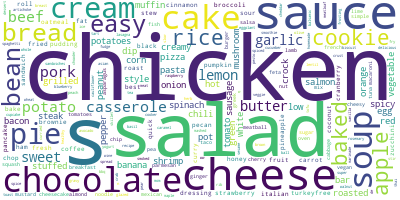

In [169]:
words = ''
# Join the different processed titles together
for val in rec.name:
    val = str(val)
    tokens = val.split(',')
    words += " ".join(tokens)+" "


# # Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue', collocations = False,  random_state=1)

# # Generate a word cloud
wordcloud.generate(words)

# # Visualize the word cloud
wordcloud.to_image()

## Recommender System

We are using Cosine Similarity to build a recipe recommendation system.  Here a combination of ingredients and the name of the recipe is used.

In [94]:
rec['combined']=rec['name']+" "+rec['ingred']

In [95]:
cv_r = CountVectorizer()
count_matrix = cv_r.fit_transform(rec["combined"])

In [96]:
cosine_sim = cosine_similarity(count_matrix)

### Use a input recipe from the above Recipes dataset that a user likes, which is used to recommend more recipes which are similar to the chosen recipe.

In [105]:
recipe = "classic hummus"

In [106]:
recipe_index = rec[rec.name==recipe]["index"].values[0]

In [107]:
similar_rec = list(enumerate(cosine_sim[recipe_index]))

In [108]:
# Sort the similar recipes in Descending order
sorted_rec = sorted(similar_rec, key=lambda x:x[1], reverse=True)

In [109]:
def get_name_from_index(index):
    return rec[rec.index==index]["name"].values[0]

In [110]:
i=0
for recipe in sorted_rec:
    print(get_name_from_index(recipe[0]))
    i=i+1
    if i>5:
        break

classic hummus
lemon dill hummus
light hummus
hummus   to die for
detoxifying hummus
creamy roasted garlic hummus


For a recipe chosen by the user which is "classic hummus", the recommender suggests a few recipes which are similar to that!